In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import warnings

In [42]:
# !pip install adversarial-robustness-toolbox

## Task-1

In [43]:
from art.estimators.classification.scikitlearn import ScikitlearnLogisticRegression

In [57]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=128)
model.fit(X_train, y_train)

LogisticRegression(max_iter=128)

In [58]:
non_private_art = ScikitlearnLogisticRegression(model)
dbrecon = DatabaseReconstruction(non_private_art)

In [59]:
X_train.shape

(75, 4)

In [60]:
warnings.filterwarnings('ignore')
from art.attacks.inference.reconstruction import DatabaseReconstruction

success = 0

for target_row in tqdm(range(len(X_train))):
    X_train_removed = np.delete(X_train, target_row, axis=0)
    y_train_removed = np.delete(y_train, target_row, axis=0)

    x, y = dbrecon.reconstruct(X_train_removed, y_train_removed)   

    # print("Inference RMSE: {}".format(
    # np.sqrt(((X_train[target_row] - x) ** 2).sum() / X_train.shape[1])))
    success += (np.argmax(y) == y_train[target_row])
    print(success)

  1%|▋                                                     | 1/75 [00:06<07:59,  6.48s/it]

0


  3%|█▍                                                    | 2/75 [00:15<09:43,  7.99s/it]

0


  4%|██▏                                                   | 3/75 [00:20<08:00,  6.68s/it]

1


  5%|██▉                                                   | 4/75 [00:28<08:36,  7.28s/it]

1


  7%|███▌                                                  | 5/75 [00:37<08:57,  7.68s/it]

2


  8%|████▎                                                 | 6/75 [00:43<08:15,  7.18s/it]

2


  9%|█████                                                 | 7/75 [00:49<07:50,  6.92s/it]

2


 11%|█████▊                                                | 8/75 [00:58<08:28,  7.59s/it]

2


 12%|██████▍                                               | 9/75 [01:09<09:20,  8.49s/it]

3


 13%|███████                                              | 10/75 [01:18<09:20,  8.62s/it]

3


 15%|███████▊                                             | 11/75 [01:24<08:22,  7.84s/it]

3


 16%|████████▍                                            | 12/75 [01:32<08:11,  7.81s/it]

3


 17%|█████████▏                                           | 13/75 [01:39<08:01,  7.76s/it]

3


 19%|█████████▉                                           | 14/75 [01:46<07:37,  7.50s/it]

3


 20%|██████████▌                                          | 15/75 [01:56<08:09,  8.16s/it]

4


 21%|███████████▎                                         | 16/75 [02:05<08:11,  8.33s/it]

5


 23%|████████████                                         | 17/75 [02:12<07:52,  8.14s/it]

5


 24%|████████████▋                                        | 18/75 [02:19<07:17,  7.67s/it]

6


 25%|█████████████▍                                       | 19/75 [02:27<07:10,  7.69s/it]

6


 27%|██████████████▏                                      | 20/75 [02:35<07:20,  8.01s/it]

6


 28%|██████████████▊                                      | 21/75 [02:41<06:40,  7.42s/it]

7


 29%|███████████████▌                                     | 22/75 [02:50<06:45,  7.66s/it]

7


 31%|████████████████▎                                    | 23/75 [02:57<06:34,  7.59s/it]

7


 32%|████████████████▉                                    | 24/75 [03:03<06:01,  7.09s/it]

8


 33%|█████████████████▋                                   | 25/75 [03:10<05:50,  7.01s/it]

8


 35%|██████████████████▎                                  | 26/75 [03:13<04:53,  5.99s/it]

8


 36%|███████████████████                                  | 27/75 [03:27<06:44,  8.43s/it]

8


 37%|███████████████████▊                                 | 28/75 [03:35<06:29,  8.28s/it]

8


 39%|████████████████████▍                                | 29/75 [03:40<05:24,  7.06s/it]

9


 40%|█████████████████████▏                               | 30/75 [03:44<04:38,  6.18s/it]

9


 41%|█████████████████████▉                               | 31/75 [03:50<04:27,  6.07s/it]

9


 43%|██████████████████████▌                              | 32/75 [03:57<04:43,  6.59s/it]

9


 44%|███████████████████████▎                             | 33/75 [04:08<05:24,  7.74s/it]

9


 45%|████████████████████████                             | 34/75 [04:18<05:42,  8.35s/it]

9


 47%|████████████████████████▋                            | 35/75 [04:29<06:10,  9.27s/it]

10


 48%|█████████████████████████▍                           | 36/75 [04:36<05:36,  8.63s/it]

11


 49%|██████████████████████████▏                          | 37/75 [04:43<05:03,  7.99s/it]

11


 51%|██████████████████████████▊                          | 38/75 [04:51<05:05,  8.25s/it]

12


 52%|███████████████████████████▌                         | 39/75 [05:05<05:51,  9.76s/it]

12


 53%|████████████████████████████▎                        | 40/75 [05:17<06:08, 10.52s/it]

12


 55%|████████████████████████████▉                        | 41/75 [05:26<05:39,  9.97s/it]

12


 56%|█████████████████████████████▋                       | 42/75 [05:39<06:00, 10.91s/it]

13


 57%|██████████████████████████████▍                      | 43/75 [05:49<05:42, 10.69s/it]

13


 59%|███████████████████████████████                      | 44/75 [06:01<05:39, 10.94s/it]

14


 60%|███████████████████████████████▊                     | 45/75 [06:08<04:59,  9.99s/it]

15


 61%|████████████████████████████████▌                    | 46/75 [06:14<04:08,  8.57s/it]

16


 63%|█████████████████████████████████▏                   | 47/75 [06:23<04:07,  8.85s/it]

16


 64%|█████████████████████████████████▉                   | 48/75 [06:30<03:45,  8.37s/it]

17


 65%|██████████████████████████████████▋                  | 49/75 [06:34<03:00,  6.93s/it]

18


 67%|███████████████████████████████████▎                 | 50/75 [06:42<02:59,  7.18s/it]

18


 68%|████████████████████████████████████                 | 51/75 [06:55<03:34,  8.94s/it]

19


 69%|████████████████████████████████████▋                | 52/75 [07:02<03:11,  8.34s/it]

19


 71%|█████████████████████████████████████▍               | 53/75 [07:08<02:47,  7.63s/it]

19


 72%|██████████████████████████████████████▏              | 54/75 [07:14<02:33,  7.33s/it]

19


 73%|██████████████████████████████████████▊              | 55/75 [07:23<02:33,  7.65s/it]

20


 75%|███████████████████████████████████████▌             | 56/75 [07:30<02:25,  7.63s/it]

20


 76%|████████████████████████████████████████▎            | 57/75 [07:36<02:06,  7.02s/it]

20


 77%|████████████████████████████████████████▉            | 58/75 [07:45<02:11,  7.74s/it]

20


 79%|█████████████████████████████████████████▋           | 59/75 [07:52<01:59,  7.48s/it]

20


 80%|██████████████████████████████████████████▍          | 60/75 [08:00<01:54,  7.66s/it]

20


 81%|███████████████████████████████████████████          | 61/75 [08:07<01:45,  7.53s/it]

20


 83%|███████████████████████████████████████████▊         | 62/75 [08:13<01:31,  7.03s/it]

20


 84%|████████████████████████████████████████████▌        | 63/75 [08:21<01:27,  7.26s/it]

20


 85%|█████████████████████████████████████████████▏       | 64/75 [08:33<01:34,  8.59s/it]

21


 87%|█████████████████████████████████████████████▉       | 65/75 [08:39<01:20,  8.03s/it]

21


 88%|██████████████████████████████████████████████▋      | 66/75 [08:48<01:13,  8.14s/it]

22


 89%|███████████████████████████████████████████████▎     | 67/75 [08:57<01:06,  8.30s/it]

23


 91%|████████████████████████████████████████████████     | 68/75 [09:03<00:55,  7.88s/it]

23


 92%|████████████████████████████████████████████████▊    | 69/75 [09:09<00:43,  7.19s/it]

23


 93%|█████████████████████████████████████████████████▍   | 70/75 [09:19<00:39,  7.89s/it]

23


 95%|██████████████████████████████████████████████████▏  | 71/75 [09:24<00:28,  7.22s/it]

24


 96%|██████████████████████████████████████████████████▉  | 72/75 [09:32<00:21,  7.27s/it]

25


 97%|███████████████████████████████████████████████████▌ | 73/75 [09:38<00:14,  7.09s/it]

25


 99%|████████████████████████████████████████████████████▎| 74/75 [09:46<00:07,  7.16s/it]

26


100%|█████████████████████████████████████████████████████| 75/75 [09:52<00:00,  7.90s/it]

26


## Task-2

In [43]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1024000)
model.fit(X_train, y_train)

# Perform database reconstruction attack
reconstructed_samples = []
for i in range(len(X_train)):
    # Remove one sample
    X_train_removed = np.delete(X_train, i, axis=0)
    y_train_removed = np.delete(y_train, i, axis=0)
    
    # Attempt to reconstruct removed sample
    sample_to_reconstruct = X_train[i].reshape(1, -1)
    predicted_class = model.predict(sample_to_reconstruct)
    if predicted_class == y_train[i]:
        reconstructed_samples.append(i)

# Report number of samples successfully reconstructed
print(f"Number of samples successfully reconstructed: {len(reconstructed_samples)} out of {len(X_train)}")

Number of samples successfully reconstructed: 438 out of 455


Reasons for Failure:
If the reconstruction fails, it could be due to various reasons:

Overlap between classes: If the classes are not well-separated in the feature space, removing a sample and trying to reconstruct it may result in misclassification, as the decision boundary might not be clear-cut.

Highly correlated features: If the features are highly correlated, removing one sample might not significantly affect the decision boundary, leading to successful reconstruction. However, if features are not highly correlated, removing a sample might have a larger impact on the decision boundary, making reconstruction more difficult.

Non-linear decision boundary: Logistic regression assumes a linear decision boundary. If the true decision boundary is non-linear, removing samples and attempting reconstruction may fail, as logistic regression cannot capture complex relationships between features.

Imbalanced classes: If the classes are imbalanced, removing samples from the majority class might have less impact on the decision boundary compared to removing samples from the minority class.

Noise in the data: If the dataset contains noise or outliers, removing samples may not significantly affect the decision boundary, leading to successful reconstruction even if the removed sample is important for classification.

It's important to consider these factors when interpreting the results of the reconstruction attack and assessing the security of the dataset.

## Task-3

In [44]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

In [64]:
# Generate a synthetic dataset for a four-class classification problem
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [66]:
# Initialize the classifiers
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
gaussian_nb_model = GaussianNB()

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Train the Gaussian Naive Bayes model
gaussian_nb_model.fit(X_train, y_train)

# Evaluate the training accuracy of both models
logistic_accuracy = logistic_model.score(X_train, y_train)
gaussian_nb_accuracy = gaussian_nb_model.score(X_train, y_train)

print(f"Logistic Regression Training Accuracy: {logistic_accuracy*100:.2f}%")
print(f"Gaussian Naive Bayes Training Accuracy: {gaussian_nb_accuracy*100:.2f}%")

Logistic Regression Training Accuracy: 65.00%
Gaussian Naive Bayes Training Accuracy: 64.38%


In [67]:
def reconstruct_sample(model, X_train, y_train, sample):
    """
    Attempts to reconstruct a sample using the given model.
    """
    prediction = model.predict(sample.reshape(1, -1))
    return prediction[0]

# Select 100 random samples from the dataset
np.random.seed(42)
sample_indices = np.random.choice(range(len(X)), size=100, replace=False)

logistic_reconstruction_success = 0
gaussian_nb_reconstruction_success = 0

for index in sample_indices:
    # Remove the sample from the dataset to create a parallel database
    X_train_parallel = np.delete(X, index, axis=0)
    y_train_parallel = np.delete(y, index)
    sample = X[index]
    true_label = y[index]
    
    # Attempt to reconstruct the sample using both classifiers
    logistic_prediction = reconstruct_sample(logistic_model, X_train_parallel, y_train_parallel, sample)
    gaussian_nb_prediction = reconstruct_sample(gaussian_nb_model, X_train_parallel, y_train_parallel, sample)
    
    # Check if the reconstruction was successful
    if logistic_prediction == true_label:
        logistic_reconstruction_success += 1
    if gaussian_nb_prediction == true_label:
        gaussian_nb_reconstruction_success += 1

print(f"Logistic Regression Reconstruction Success: {logistic_reconstruction_success} samples")
print(f"Gaussian Naive Bayes Reconstruction Success: {gaussian_nb_reconstruction_success} samples")

Logistic Regression Reconstruction Success: 54 samples
Gaussian Naive Bayes Reconstruction Success: 55 samples


## Task-4

In [68]:
# !pip install diffprivlib

In [71]:
from diffprivlib.models import LogisticRegression as DPLogisticRegression
from diffprivlib.models import GaussianNB as DPGaussianNB

# Initialize the differentially private logistic regression model
dp_logistic_model = DPLogisticRegression(epsilon=1.0, data_norm=12.0)

# Train the model with differential privacy
dp_logistic_model.fit(X_train, y_train)

# Evaluate its accuracy on the test set
dp_logistic_accuracy = dp_logistic_model.score(X_test, y_test)
print(f"Differentially Private Logistic Regression Test Accuracy: {dp_logistic_accuracy*100:.2f}%")

Differentially Private Logistic Regression Test Accuracy: 28.00%


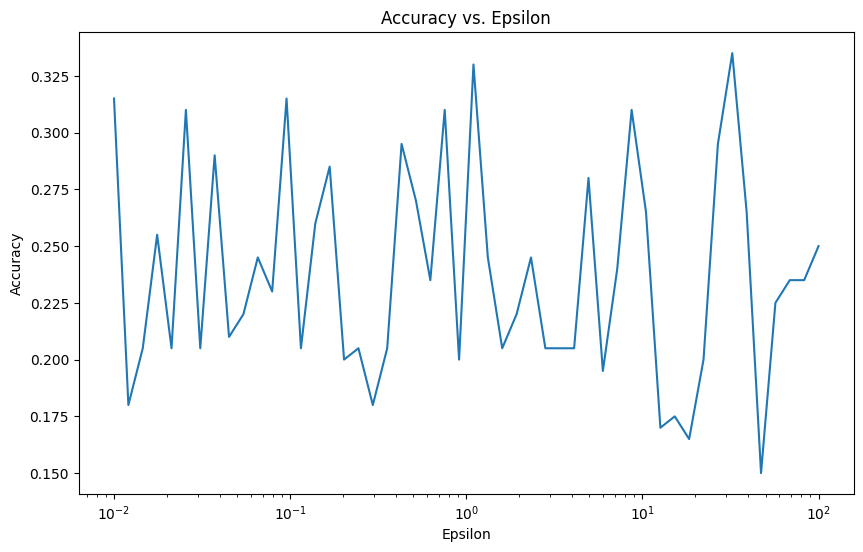

In [72]:
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
accuracies = []

for eps in epsilons:
    dp_model = DPLogisticRegression(epsilon=eps, data_norm=12.0)
    dp_model.fit(X_train, y_train)
    accuracy = dp_model.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs epsilon
plt.figure(figsize=(10, 6))
plt.semilogx(epsilons, accuracies)
plt.title('Accuracy vs. Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.show()